# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

val_set = val_datagen.flow_from_directory('dataset/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
model3 = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding third convolution layer

In [8]:
model3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
model3.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
model3.add(tf.keras.layers.Dense(units=256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

### Step 5 - Output Layer

In [11]:
model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
history = model3.fit(x = training_set, validation_data = val_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 102s 620ms/step - loss: 0.5063 - accuracy: 0.7654 - val_loss: 0.5627 - val_accuracy: 0.6250
Epoch 2/25
163/163 [==============================] - 99s 607ms/step - loss: 0.2317 - accuracy: 0.9078 - val_loss: 0.5147 - val_accuracy: 0.6250
Epoch 3/25
163/163 [==============================] - 98s 599ms/step - loss: 0.2026 - accuracy: 0.9217 - val_loss: 0.3703 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 98s 599ms/step - loss: 0.1833 - accuracy: 0.9310 - val_loss: 0.3864 - val_accuracy: 0.8125
Epoch 5/25
163/163 [==============================] - 98s 601ms/step - loss: 0.1787 - accuracy: 0.9270 - val_loss: 0.7503 - val_accuracy: 0.6250
Epoch 6/25
163/163 [==============================] - 98s 603ms/step - loss: 0.1689 - accuracy: 0.9346 - val_loss: 0.6112 - val_accuracy: 0.6875
Epoch 7/25
163/163 [==============================] - 99s 606ms/step - loss: 0.1436 - accuracy: 0.9449 - val_loss: 1.0426 - val_a

## Accuracy

In [15]:
train_loss, train_acc  = model3.evaluate(training_set)
test_loss, test_acc = model3.evaluate(test_set)
train_acc = train_acc*100
test_acc = test_acc*100
print('train: %.2f, test: %.2f' % (train_acc, test_acc))

20/20 [==============================] - 9s 453ms/step - loss: 0.3703 - accuracy: 0.9054
train: 96.66, test: 90.54


## Model Accuracy Graph

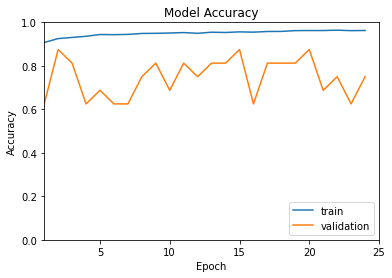

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([1,25])
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.savefig('model3_AccuracyVsValidationAccuracy.jpg')

## Model Loss Graph

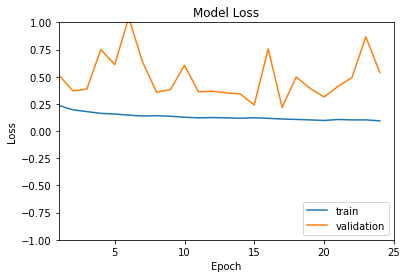

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-1, 1])
plt.xlim([1,25])
plt.title('Model Loss')
plt.legend(loc='lower right')
plt.savefig('model3_LossVsValidationLoss.jpg')

In [18]:
model3.save('cnnModel3.h5')